<a href="https://colab.research.google.com/github/ShyrleyFlor/Fresas_PDI_/blob/main/PDI_fresas_Segmentaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importamos las librerias**

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from cv2 import imread

# **Funcion mostrar imagen y dimensiones**

In [ ]:
def mostrar_imagen_y_dimensiones(imagen):
    """Muestra la imagen junto con sus dimensiones."""
    print('Dimensiones de la imagen:', imagen.shape)
    cv2_imshow(imagen)



# **Funcion descomposición en canales RGB**


In [ ]:
def descomponer_canales(imagen_rgb):
    """Descompone la imagen en sus canales RGB y muestra cada uno por separado."""
    canal_rojo, canal_verde, canal_azul = cv2.split(imagen_rgb)

    # Mostrar los canales por separado
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title('Canal Rojo')
    plt.imshow(canal_rojo, cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title('Canal Verde')
    plt.imshow(canal_verde, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title('Canal Azul')
    plt.imshow(canal_azul, cmap='gray')

    plt.show()

# **La funcion segmentar imagen**


*   Convierte la imagen en escala de grises
*   Aplica umbralización para obtener una imagen binaria
*   Filtra filas con pocos píxeles verdaderos
*   Detecta bordes
*   Encuentra los contornos en la imagen binaria
*   Obtiene los límites del contorno








In [ ]:
def segmentar_fresa(imagen_rgb):
    """Segmenta la fresa en la imagen y devuelve una máscara binaria y los límites de la fresa."""
    # Descomponer la imagen en canales RGB
    descomponer_canales(imagen_rgb)

    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

    # Aplicar umbralización para obtener una imagen binaria
    _, imagen_binaria = cv2.threshold(imagen_gris, 200, 255, cv2.THRESH_BINARY_INV)

    # Mostrar la imagen binaria
    cv2_imshow(imagen_binaria)

    # Definir la máscara binaria
    Q = imagen_binaria > 0

    # Filtrar filas con pocos píxeles verdaderos
    (N, M) = Q.shape
    for i in range(N):
        s = np.sum(Q[i, :])
        if s < 20:
            Q[i, :] = 0

    # Mostrar la imagen binaria filtrada
    cv2_imshow(Q * 255)

    # Detección de bordes
    E = np.zeros((N, M), np.uint8)
    for i in range(N):
        for j in range(1, M):
            if Q[i, j] != Q[i, j-1]:
                E[i, j] = 1
                E[i, j-1] = 1

    for i in range(1, N):
        for j in range(M):
            if Q[i-1, j] != Q[i, j]:
                E[i, j] = 1
                E[i-1, j] = 1

    # Mostrar los bordes detectados
    cv2_imshow(E * 255)

    # Crear la imagen con bordes en negro
    Icv = imagen_rgb.copy()
    for i in range(N):
        for j in range(M):
            if E[i, j] == 1:
                Icv[i, j, :] = [0, 255, 0]  # Color negro

    # Mostrar la imagen con los bordes superpuestos
    cv2_imshow(Icv)

    # Encontrar los contornos en la imagen binaria
    contornos, _ = cv2.findContours(Q.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Encontrar el contorno más grande
    if len(contornos) == 0:
        print("No se encontraron contornos.")
        return None, None

    contorno_mayor = max(contornos, key=cv2.contourArea)

    # Obtener los límites del contorno
    x, y, w, h = cv2.boundingRect(contorno_mayor)

    return Q, (x, y, x + w, y + h)


In [ ]:
# Descargar la imagen desde Google Drive
file_id = '1HtFNH1PFCLCS3UJXMrOjogV7XGvSA45U'
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', 'fresas.jpg', quiet=False)
imagen = imread('fresas.jpg')


Downloading...
From: https://drive.google.com/uc?export=download&id=1HtFNH1PFCLCS3UJXMrOjogV7XGvSA45U
To: /content/fresas.jpg
100%|██████████| 12.7k/12.7k [00:00<00:00, 24.8MB/s]


Dimensiones de la imagen: (224, 225, 3)


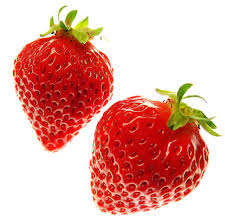

In [ ]:
# Mostrar la imagen y sus dimensiones
mostrar_imagen_y_dimensiones(imagen)

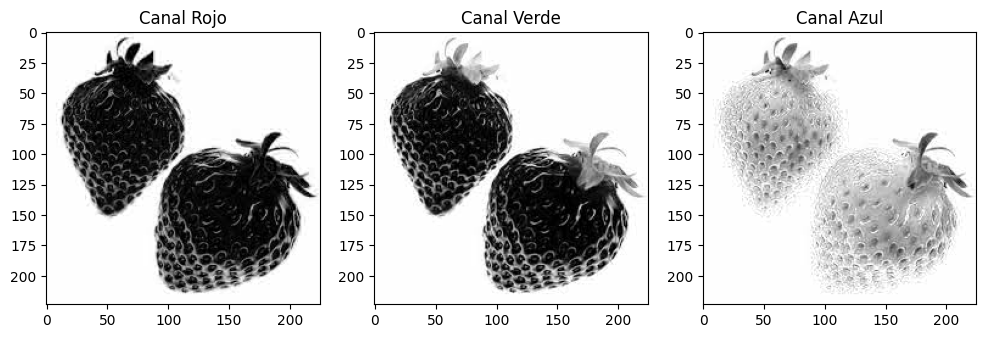

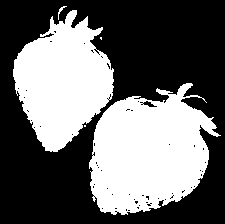

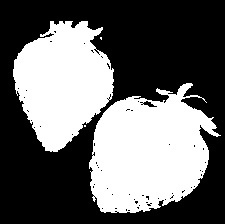

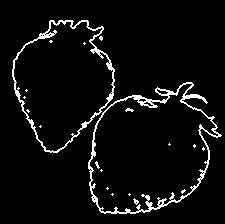

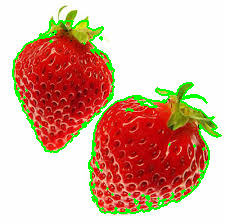

In [ ]:
# Realizar la segmentación de la fresa
imagen_segmentada, limites_fresa = segmentar_fresa(imagen)
